In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [21]:
from google.colab import files


uploaded = files.upload()

Saving USA_train.csv to USA_train (1).csv


In [22]:
USATrain=pd.read_csv("USA_train.csv")

<Axes: >

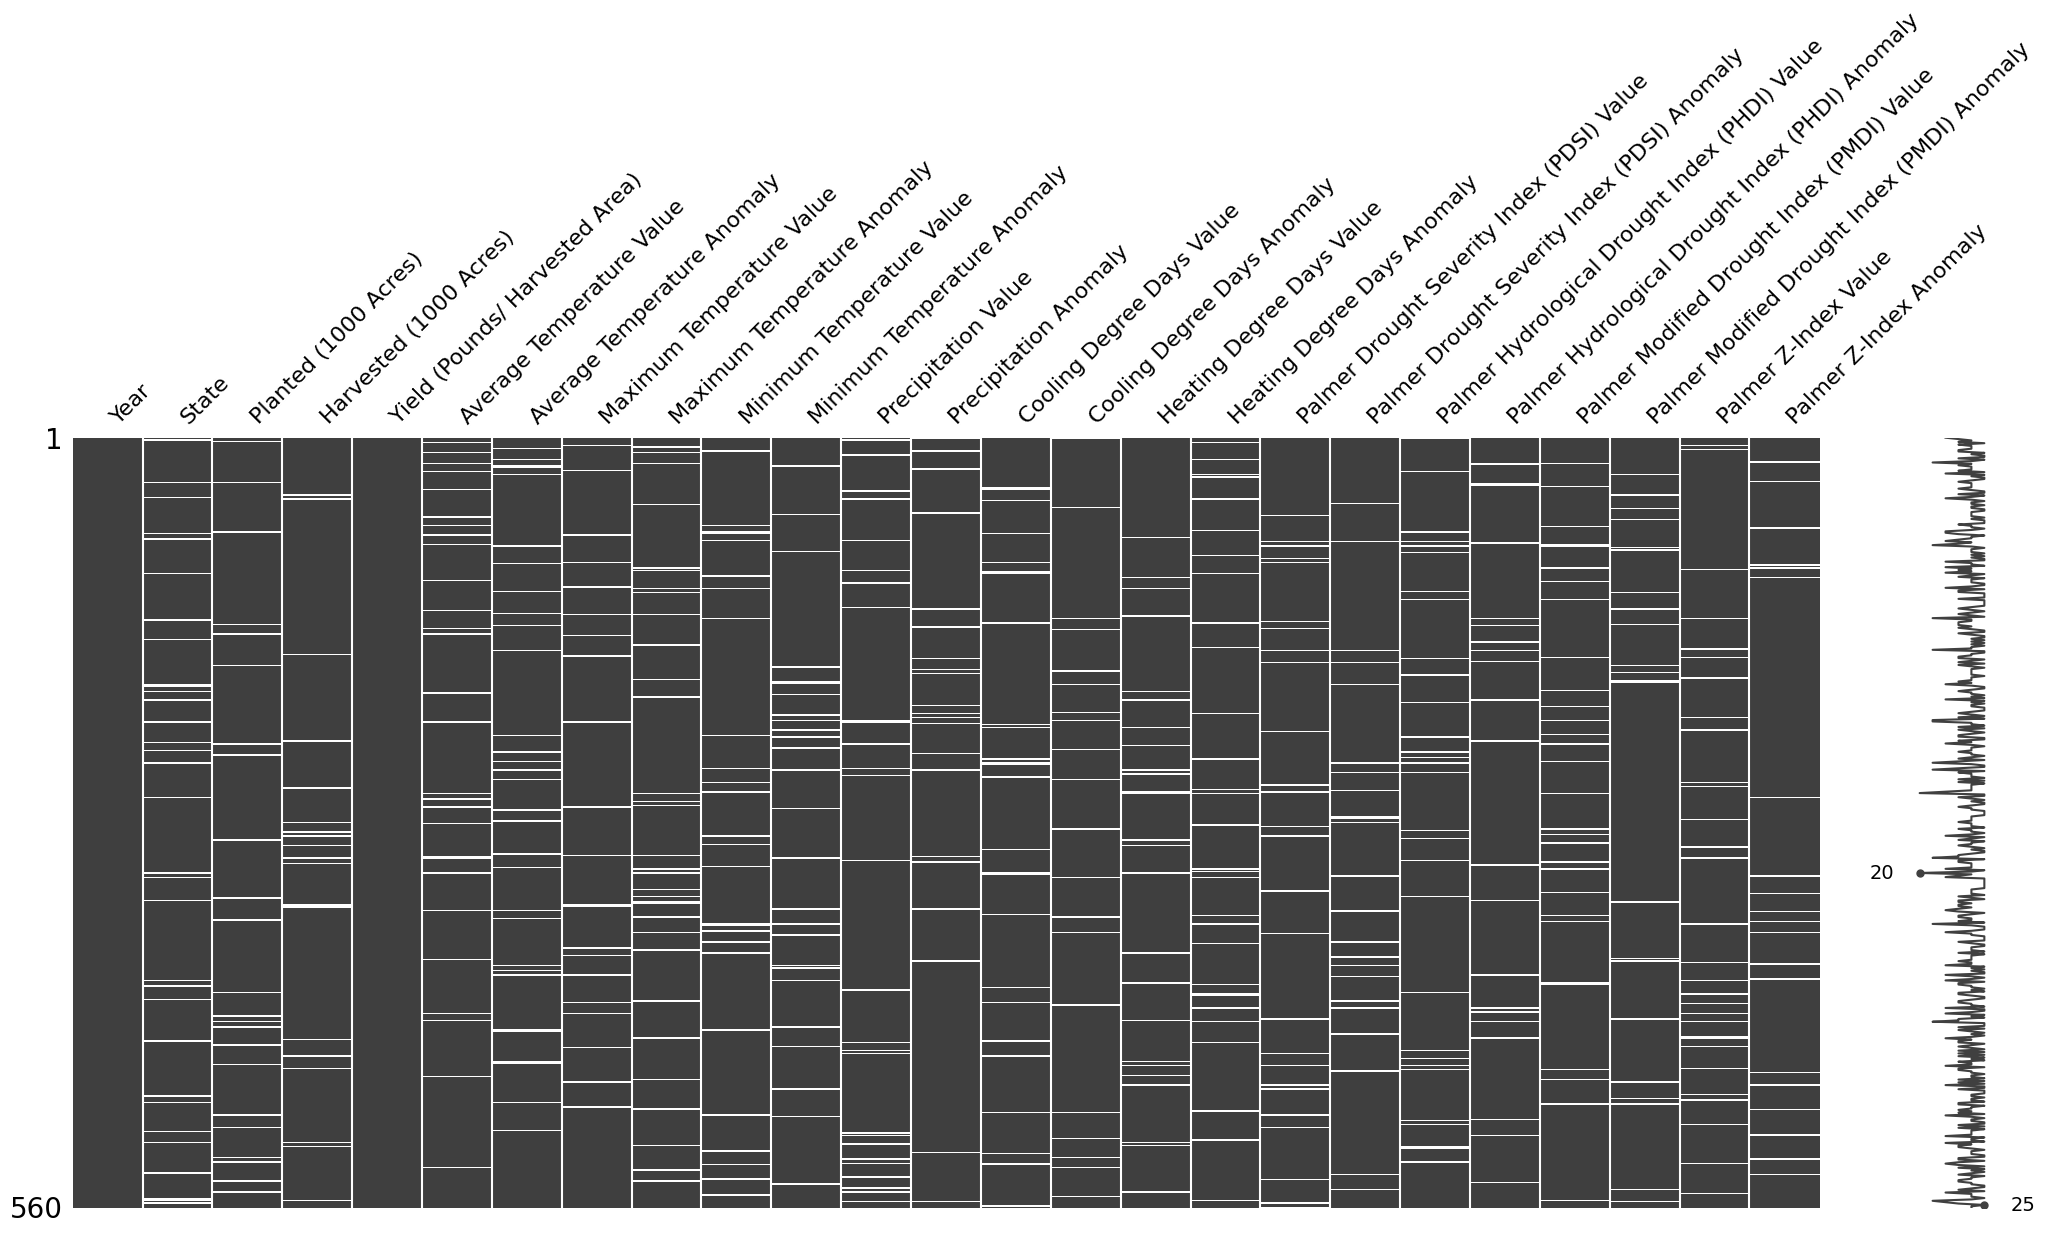

In [23]:
import missingno as msno
msno.matrix(USATrain)

In [24]:
USATrain['Planted (1000 Acres)']=USATrain['Planted (1000 Acres)'].str.replace(',','')
USATrain['Harvested (1000 Acres)']=USATrain['Harvested (1000 Acres)'].str.replace(',','')
USATrain.shape

(560, 25)

In [25]:
USATrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             528 non-null    object 
 2   Planted (1000 Acres)                              537 non-null    object 
 3   Harvested (1000 Acres)                            540 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         532 non-null    float64
 6   Average Temperature Anomaly                       529 non-null    float64
 7   Maximum Temperature Value                         538 non-null    float64
 8   Maximum Temperature Anomaly                       527 non-null    float64
 9   Minimum Temperature V

In [26]:
USATrain.describe()

,Year,Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,560.000000,560.000000,532.000000,529.000000,538.000000,527.000000,533.000000,534.000000,533.000000,539.000000,...,535.000000,530.000000,534.000000,536.000000,530.000000,538.000000,530.000000,538.000000,530.000000,539.000000
mean,1988.500000,538.010714,61.607221,2.016005,73.572878,2.121837,49.818261,1.996941,5.882753,2.530091,...,294.366199,11.006761,2.778761,2.626225,2.795374,2.584857,2.776687,2.657643,2.656437,2.563550
std,8.084969,321.951007,5.325217,1.521716,5.155871,1.597006,5.732206,1.587296,1.741681,1.223086,...,113.144409,25.100424,2.209194,2.132811,2.347275,2.399436,2.170548,2.209566,1.364614,1.398117
min,1975.000000,0.000000,50.108333,-1.683333,60.683333,-1.958333,36.300000,-2.416667,1.520000,-0.113333,...,37.000000,-87.250000,-3.079167,-2.780833,-2.623333,-3.364167,-2.972500,-3.124167,-0.697500,-0.665000
25%,1981.750000,370.000000,57.487500,0.850000,69.691667,1.045833,46.058333,0.779167,4.832500,1.569583,...,216.125000,-6.125000,1.188542,1.122292,1.233333,0.900000,1.370000,1.160625,1.660625,1.479583
50%,1988.500000,547.000000,61.475000,2.100000,73.591667,2.141667,49.558333,1.933333,5.925000,2.504167,...,287.416667,11.041667,2.792083,2.527917,2.791250,2.560000,2.740000,2.430833,2.595417,2.683333
75%,1995.250000,716.000000,65.400000,3.133333,77.381250,3.241667,53.875000,3.116667,7.217500,3.527083,...,379.666667,27.729167,4.152292,3.885208,4.312500,4.247917,4.145208,4.190625,3.605417,3.566250
max,2002.000000,1470.000000,75.550000,5.866667,86.608333,6.575000,64.791667,6.733333,10.623333,5.207500,...,598.333333,79.500000,9.797500,9.265000,9.635833,10.426667,10.410000,11.182500,6.330833,7.102500


In [27]:
USATrain['Planted (1000 Acres)']=pd.to_numeric(USATrain['Planted (1000 Acres)'])
USATrain['Harvested (1000 Acres)']=pd.to_numeric(USATrain['Harvested (1000 Acres)'])
USATrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             528 non-null    object 
 2   Planted (1000 Acres)                              537 non-null    float64
 3   Harvested (1000 Acres)                            540 non-null    float64
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         532 non-null    float64
 6   Average Temperature Anomaly                       529 non-null    float64
 7   Maximum Temperature Value                         538 non-null    float64
 8   Maximum Temperature Anomaly                       527 non-null    float64
 9   Minimum Temperature V

<ipython-input-28-b551c4608662>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USATrain[column])
<ipython-input-28-b551c4608662>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USATrain[column])
<ipython-input-28-b551c4608662>:9: UserWarning: 

`distplot` is a deprecated function and will be 

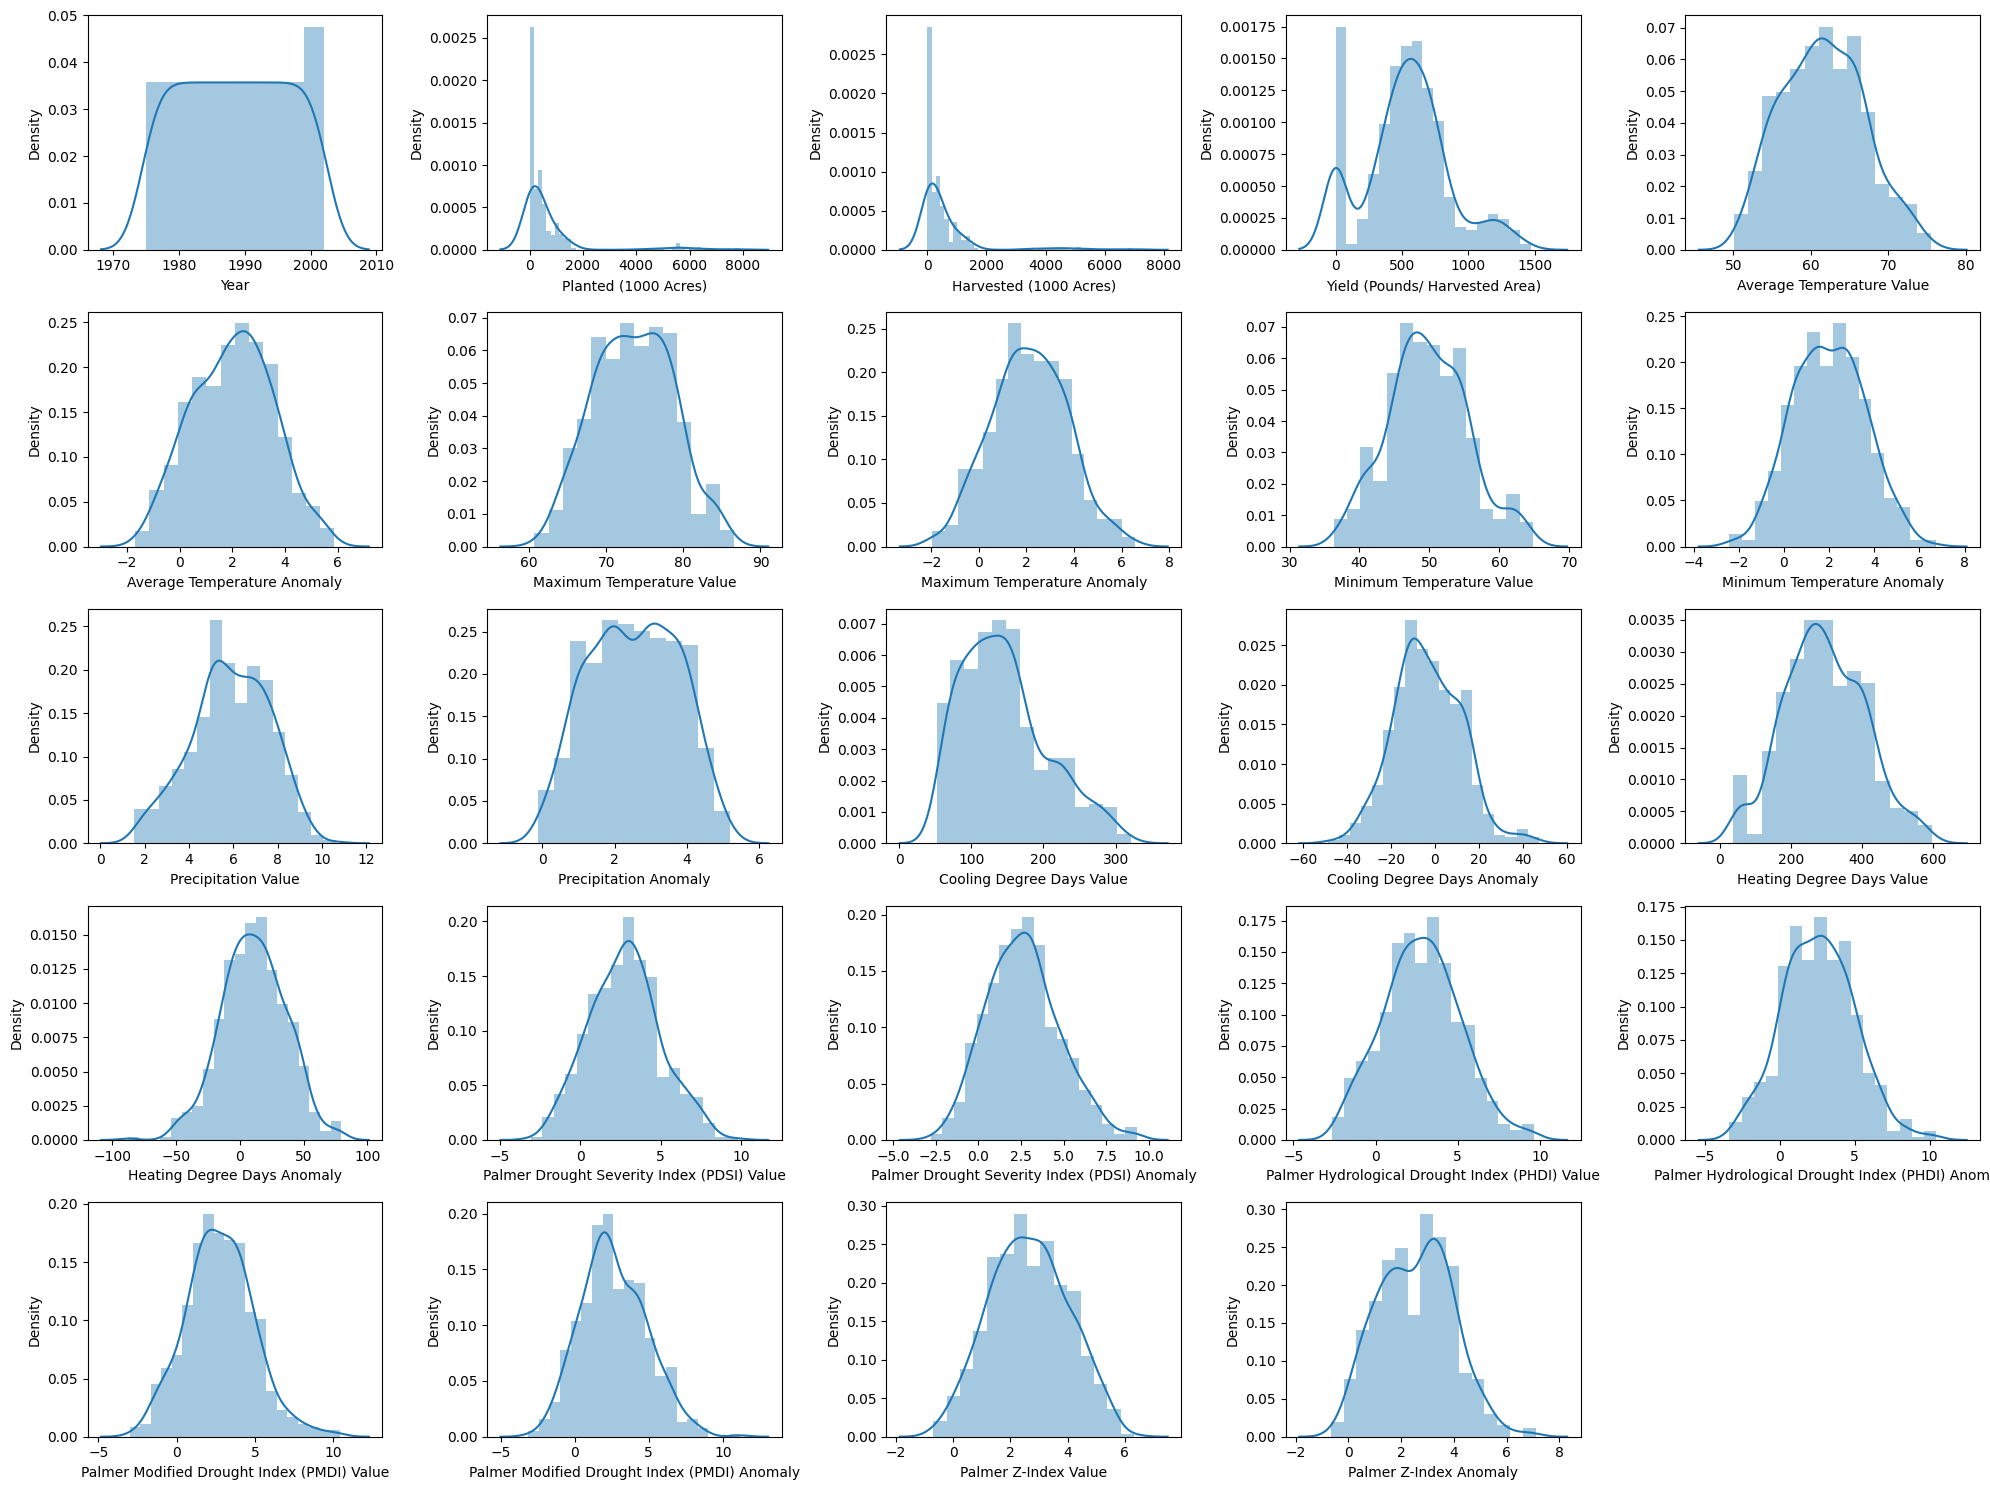

In [28]:
# checking numerical features distribution
num_cols = [col for col in USATrain.columns if USATrain[col].dtype != 'object']
plt.figure(figsize = (20,15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 25:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(USATrain[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [29]:
# Filling the missing values using median because outlier is present
# For the Harvested column we are copying the values from Planted column
USATrain['Planted (1000 Acres)'].fillna(USATrain['Planted (1000 Acres)'].median(),inplace=True)
USATrain['Harvested (1000 Acres)'].fillna(USATrain['Planted (1000 Acres)'],inplace=True)

In [30]:
# Filling the missing values
num_cols = [col for col in USATrain.columns if USATrain[col].dtype != 'object']

for column in num_cols:
    USATrain[column].fillna(USATrain[column].mean(),inplace=True)

USATrain['State'].fillna('other',inplace=True)
print(USATrain.shape)
print(USATrain.info())

(560, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             560 non-null    object 
 2   Planted (1000 Acres)                              560 non-null    float64
 3   Harvested (1000 Acres)                            560 non-null    float64
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         560 non-null    float64
 6   Average Temperature Anomaly                       560 non-null    float64
 7   Maximum Temperature Value                         560 non-null    float64
 8   Maximum Temperature Anomaly                       560 non-null    float64
 9   Minimum Tem

In [31]:
le = LabelEncoder()
dfle1 = USATrain
dfle1.State = le.fit_transform(dfle1.State)

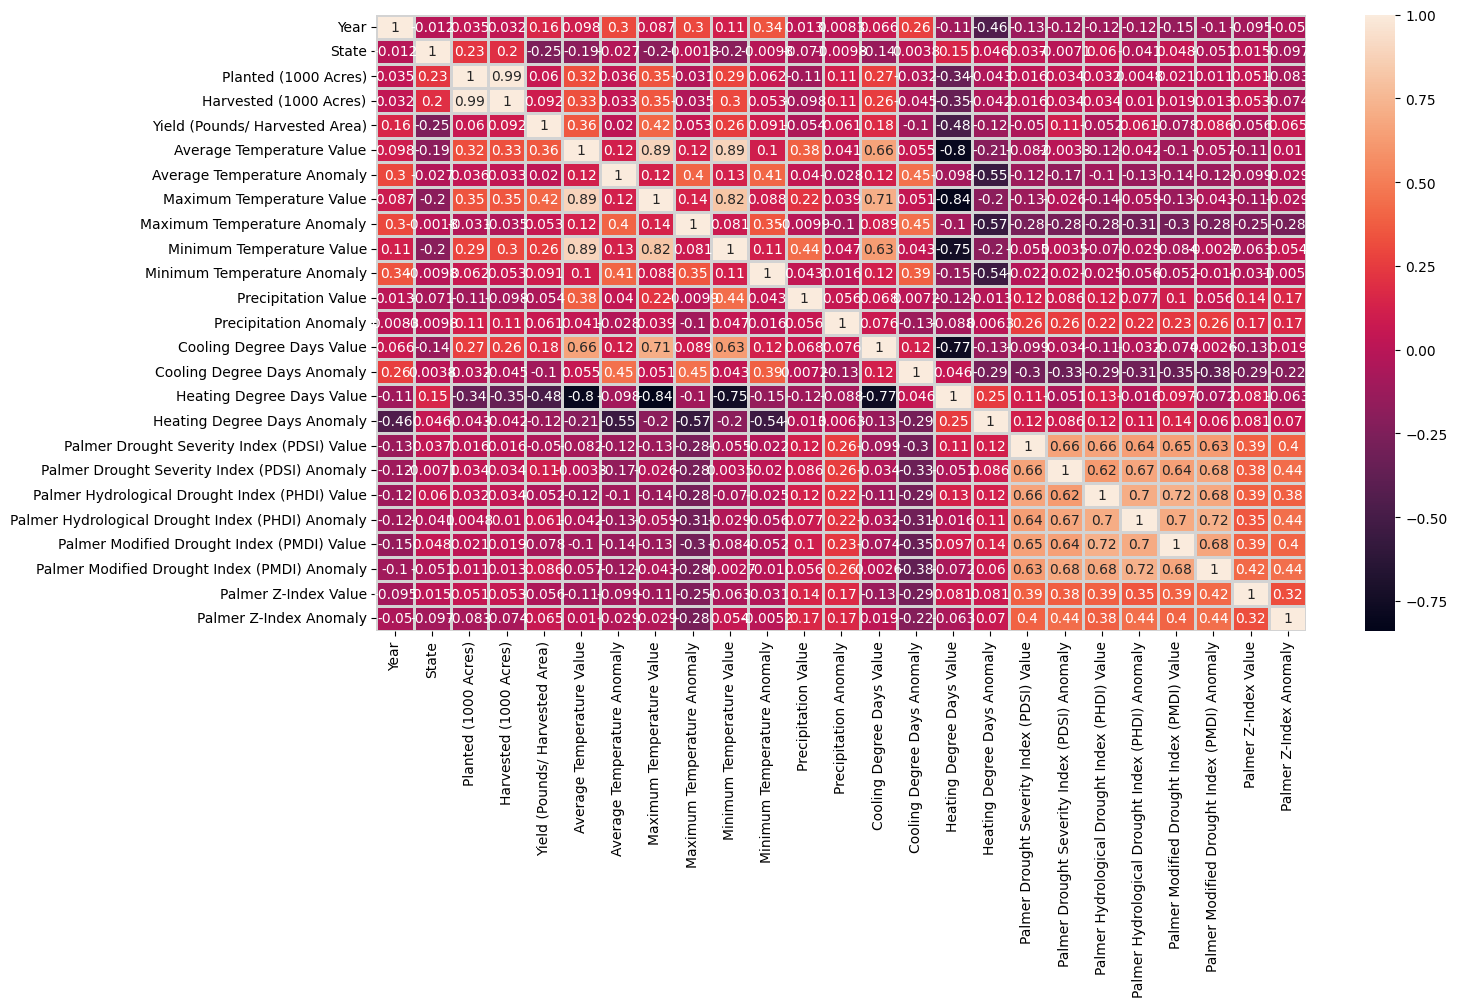

In [32]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(USATrain.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


In [36]:
USATrain['Diff']=USATrain['Planted (1000 Acres)']-USATrain['Harvested (1000 Acres)']
# print(USATrain.Diff)
USATrain.drop(USATrain[USATrain['Diff']<0].index,inplace=True)
# print(USATrain.shape)
USATrain['New']=USATrain['Harvested (1000 Acres)']/USATrain['Yield (Pounds/ Harvested Area)']
# print(USATrain['New'].head(10))
USATrain.drop(USATrain[USATrain['New']==0].index,inplace=True)
# print(USATrain.shape)
USATrain1=USATrain.drop(['Diff','New'],axis='columns')
print(USATrain1.shape)
USATrain1.info()

(541, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              541 non-null    int64  
 1   State                                             541 non-null    int64  
 2   Planted (1000 Acres)                              541 non-null    float64
 3   Harvested (1000 Acres)                            541 non-null    float64
 4   Yield (Pounds/ Harvested Area)                    541 non-null    int64  
 5   Average Temperature Value                         541 non-null    float64
 6   Average Temperature Anomaly                       541 non-null    float64
 7   Maximum Temperature Value                         541 non-null    float64
 8   Maximum Temperature Anomaly                       541 non-null    float64
 9   Minimum Tem

In [37]:
USATrain3=USATrain1.drop(['Year','Planted (1000 Acres)','Average Temperature Anomaly','Maximum Temperature Anomaly','Minimum Temperature Anomaly','Precipitation Value','Precipitation Anomaly','Cooling Degree Days Value','Cooling Degree Days Anomaly','Heating Degree Days Anomaly','Palmer Drought Severity Index (PDSI) Value','Palmer Drought Severity Index (PDSI) Anomaly','Palmer Hydrological Drought Index (PHDI) Value','Palmer Hydrological Drought Index (PHDI) Anomaly','Palmer Modified Drought Index (PMDI) Value','Palmer Modified Drought Index (PMDI) Anomaly','Palmer Z-Index Value','Palmer Z-Index Anomaly'],axis='columns')
USATrain3.shape

(541, 7)

BUILDING A MODEL

In [50]:
X=USATrain3.drop('Yield (Pounds/ Harvested Area)',axis='columns')
Y=USATrain3['Yield (Pounds/ Harvested Area)']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [70]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
model=XGBRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9385028504015948

USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR XGB REGRESSION MODEL

In [52]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=25)
score=cross_val_score(XGBRegressor(), X, Y, cv=cv)
print(score)
print(np.mean(score))

[0.88197395 0.84497807 0.89842389 0.87780859 0.8566662 ]
0.8719701408383751


EXPORT THE TESTED MODEL TO A PICKLE FILE

In [48]:
import pickle
with open('yield_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

EXPORT LOCATION AND COLUMN INFORMATION TO A FILE THAT WILL BE USEFUL LATER ON IN OUR PREDICTION APPLICATION

In [49]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))